In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("housepricedata.csv")
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,Abovemedianprice
0,8450,7,5,856,2,1,3,8,0,548.0,Yes
1,9600,6,8,1262,2,0,3,6,1,460.0,Yes
2,11250,7,5,920,2,1,3,6,1,NaN,Yes
3,9550,7,5,756,1,0,3,7,1,NaN,no
4,14260,8,5,1145,2,1,4,9,1,836.0,Yes


In [3]:
data = data.drop(["Abovemedianprice"], axis=1)
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548.0
1,9600,6,8,1262,2,0,3,6,1,460.0
2,11250,7,5,920,2,1,3,6,1,NaN
3,9550,7,5,756,1,0,3,7,1,NaN
4,14260,8,5,1145,2,1,4,9,1,836.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   OverallCond   1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   FullBath      1460 non-null   int64  
 5   HalfBath      1460 non-null   int64  
 6   BedroomAbvGr  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   Fireplaces    1460 non-null   int64  
 9   GarageArea    1454 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [5]:
data.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
TotalBsmtSF     0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      6
dtype: int64

In [6]:
data.GarageArea = data.GarageArea.fillna(data.GarageArea.mean())

In [7]:
data.isna().sum()

LotArea         0
OverallQual     0
OverallCond     0
TotalBsmtSF     0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
X = data.drop(['LotArea'], axis=1)
y = data['LotArea']
X.head()

,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,0.651479,-0.517200,-0.459303,0.789741,1.227585,0.163779,0.912210,-0.951226,3.533000e-01
1,-0.071836,2.179628,0.466465,0.789741,-0.761621,0.163779,-0.318683,0.600495,-5.911701e-02
2,0.651479,-0.517200,-0.313369,0.789741,1.227585,0.163779,-0.318683,0.600495,-2.663999e-16
3,0.651479,-0.517200,-0.687324,-1.026041,-0.761621,0.163779,0.296763,0.600495,-2.663999e-16
4,1.374795,-0.517200,0.199680,0.789741,1.227585,1.390023,1.527656,0.600495,1.703028e+00


In [9]:
y.head()

0   -0.207142
1   -0.091886
2    0.073480
3   -0.096897
4    0.375148
Name: LotArea, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Linear Regression**

In [11]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [12]:
LR_predict = LR.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, LR_predict)}")
print(f"R2 Score: {r2_score(y_test, LR_predict)}")

Mean Squared Error: 0.31365090877721064
R2 Score: 0.09568692196079542


In [13]:


def gradient_descent(X, y, m, c, L):
    dm = 0
    dc = 0
    for i in range(len(X)):
        dm = dm + ((2/len(X))*((m*X[i]+c - y[i])*X[i]))
        dc = dc + (2/len(X))*((m*X[i]+c - y[i] ))
    m = m - L*dm
    c = c - L*dc
    return m, c


In [14]:
m = 0
c =  0
L = 0.01 
for i in range(100):
    m0, c0 = gradient_descent(np.array(X_train.TotRmsAbvGrd), np.array(y_train), m, c, L)

print(f"Slope is: {m0}")
print(f"Intercept is: {c0}")

Slope is: 0.0040251672685378695
Intercept is: 0.00034639548309234786


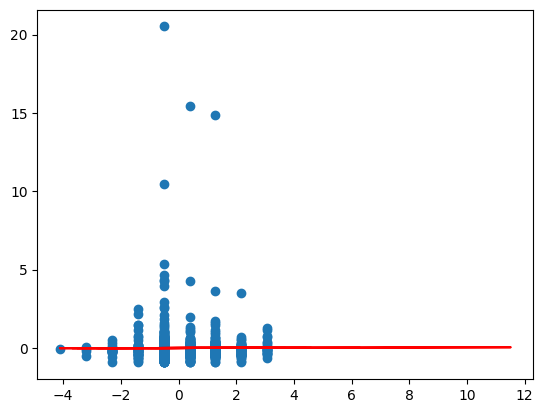

In [15]:
plt.scatter(X_train.OverallCond, y_train)
y_pred = m0*X_train+c0
plt.plot(X_train, y_pred, color="red")

In [16]:
df = pd.read_csv('Training_set_heights200.csv')
df.head()

,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df

array([[0.55738247, 0.53872437],
       [0.49548119, 0.40985671],
       [0.64949743, 0.4243548 ],
       [0.95203779, 0.98519959],
       [0.67375104, 0.66730199],
       [0.43738377, 0.34466862],
       [0.34908247, 0.50992308],
       [0.60113031, 0.68675989],
       [0.73623936, 0.75590033],
       [0.37092206, 0.46972895],
       [0.46437503, 0.39039343],
       [0.60406131, 0.59593869],
       [0.79874449, 0.71333218],
       [0.47575998, 0.35674282],
       [0.49263425, 0.55948975],
       [0.62913734, 0.59716023],
       [1.        , 0.60338839],
       [0.54525776, 0.3960699 ],
       [0.64237588, 0.57734553],
       [0.73658121, 0.8075786 ],
       [0.54945671, 0.68787861],
       [0.75975041, 0.65702327],
       [0.55166617, 0.80390401],
       [0.73663586, 0.72803437],
       [0.34895497, 0.56025398],
       [0.64312404, 0.59457137],
       [0.57725078, 0.4842585 ],
       [0.41982578, 0.39622106],
       [0.60528863, 0.44350885],
       [0.60712822, 0.32756095],
       [0.

In [18]:
x = df[:, 0]
y = df[:, 1]

In [19]:
m = 0
c = 0
L = 0.34
for i in range(100):
    m0, c0 = gradient_descent(x, y, m, c, L) 

print(f"Slope is: {m0}")
print(f"Intercept is: {c0}")

Slope is: 0.2160756868466679
Intercept is: 0.37954039719612426


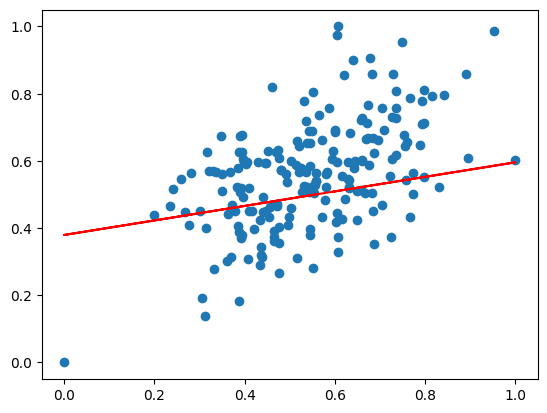

In [24]:
plt.scatter(x, y)
y_pred = m0*x+c0
plt.plot(x.reshape(-1, 1), y_pred, color="red")

In [48]:
from sklearn.preprocessing import PolynomialFeatures
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=6, include_bias=True)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

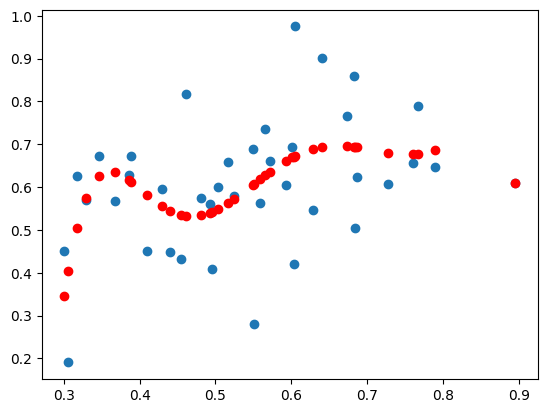

In [49]:
LR2 = LinearRegression()
LR2.fit(X_train_poly, y_train)
plt.scatter(X_train, y_train)
plt.scatter(X_train, LR2.predict(X_train_poly), color = "red")
plt.show()

In [35]:
X_train.shape

(39,)

In [36]:
X_train_poly.shape

(39, 4)